# Vježba 7 - Frekvencijska analiza signala korištenjem DFT

## Izračunavanje konvolucije pomoću DFT

1. Napisati funkciju u Python-u koja će izračunavati konvoluciju zadatih nizova pomoću DFT.

In [9]:
%matplotlib notebook
import matplotlib.pyplot as pyplot
import numpy.fft as fft
import scipy.signal.windows as windows

In [10]:
import numpy.fft as fft

def fconv(h, x):
    H = fft.rfft(h, len(h) + len(x) - 1)
    X = fft.rfft(x, len(h) + len(x) - 1)
    return fft.irfft(H * X)

2. Testirati funkciju na primjeru nizova $h(n) = \left\{1,2,3\right\}$ i $x(n) = \left\{1,2,2,1\right\}$ . 

In [11]:
import numpy as np
x = np.array([1, 2, 2, 1])
h = np.array([1, 2, 3])
result = np.convolve(h, x)
print(result)
result = fconv(h, x)
print(result)

[ 1  4  9 11  8  3]
[ 1.  4.  9. 11.  8.  3.]


3. Prednost izračunavanja konvolucije pomoću DFT postaje vidljiva kada se računa konvolucija dugih nizova. Da biste ovo provjerili učitajte signale u fajlovima <i>handel11025.wav</i> i <i>impulse_cathedral.wav</i> i odredite njihovu konvoluciju pomoću Numpy funkcije convolve (u vremenskom domenu) i vaše funkcije fconv (u frekvencijskom domenu).

In [12]:
### KOD
import scipy.io.wavfile as wavfile
import time
fs, data = wavfile.read("handel11025.wav")
fs, dataCath = wavfile.read("impulse_cathedral.wav")
ch1 = data[:, 0]
ch2 = data[:, 1]
start = time.perf_counter_ns()
ch1Res = np.convolve(ch1, dataCath)
ch2Res = np.convolve(ch2, dataCath)
end = time.perf_counter_ns()
print((end - start) / (10 ** 6))

start = time.perf_counter_ns()
ch1Res = fconv(ch1, dataCath)
ch2Res = fconv(ch2, dataCath)
end = time.perf_counter_ns()
print((end - start) / (10 ** 6))

7657.1997
114.8742


## Curenje spektra

1. Dat je diskretni signal $x(n) = cos(2\pi n/\sqrt{31})$. Generisati $L = 32$ odmjerka datog signala. Nacrtati signal u vremenskom domenu. Da li je signal periodičan?

<IPython.core.display.Javascript object>


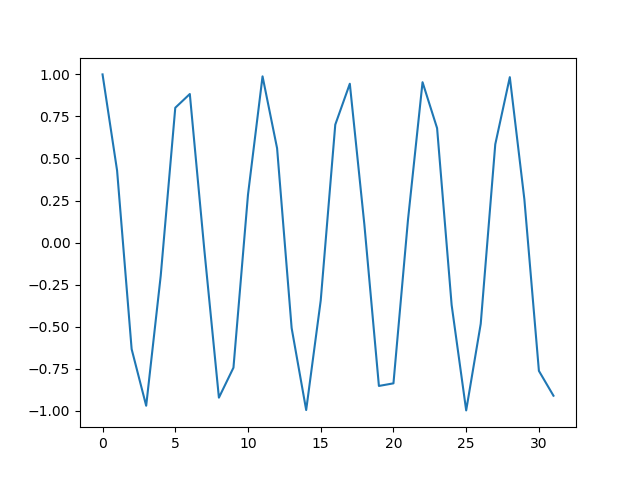

In [18]:
### KOD

L = 32
n = np.arange(0, L)
x = np.cos((2 * np.pi * n) / (31 ** 0.5))
pyplot.figure()
pyplot.plot(x)

2. Izračunati DFT datog signala u $N = 32$ tačke. Nacrtati moduo DFT, a na apscisi označiti indeks DFT (koristiti naredbu stem).

<IPython.core.display.Javascript object>


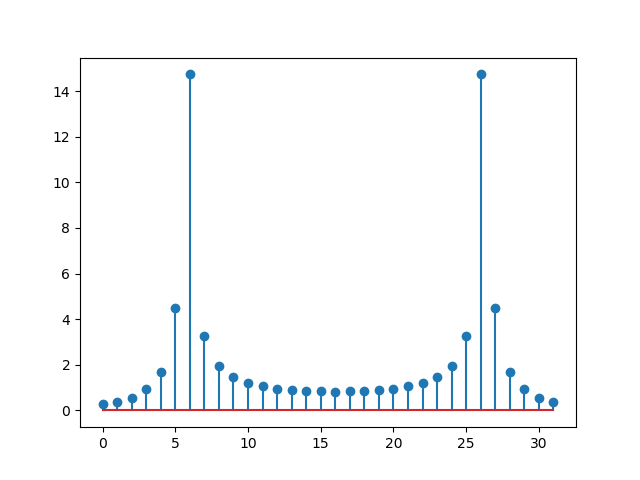

<StemContainer object of 3 artists>

In [19]:
### KOD
X = fft.fft(x)
pyplot.figure()
pyplot.stem(np.abs(X))

3. Nacrtati amplitudni spektar diskretnog signala $x(n)$ (kontinualna funkcija, koristiti naredbu plot) tako da na apscisi bude digitalna frekvencija normalizovana tako da vrijednost 1 odgovara frekvenciji od $\pi$ rad/odmjerku. Nacrtati dva grafika: na jednom na ordinati treba da bude moduo spektra signala, a na drugom moduo u dB. Da li je došlo do curenja spektra signala? Objasniti. Zašto se na dobijenom spektru ne vide bočni lukovi karakteristični za izračunavanje spektra na osnovu sekvence konačnog trajanja?

<IPython.core.display.Javascript object>


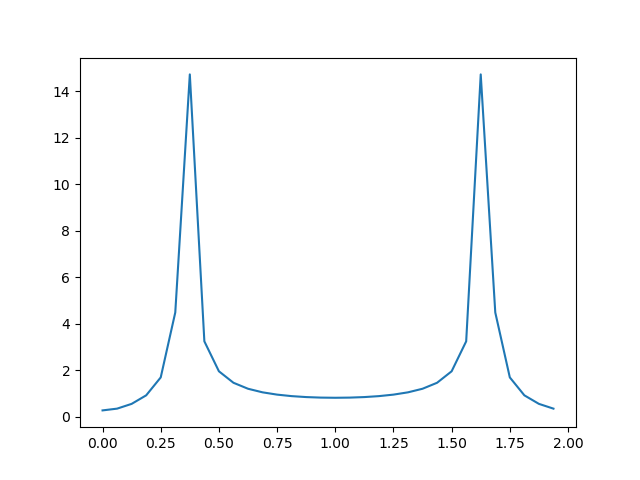

<IPython.core.display.Javascript object>


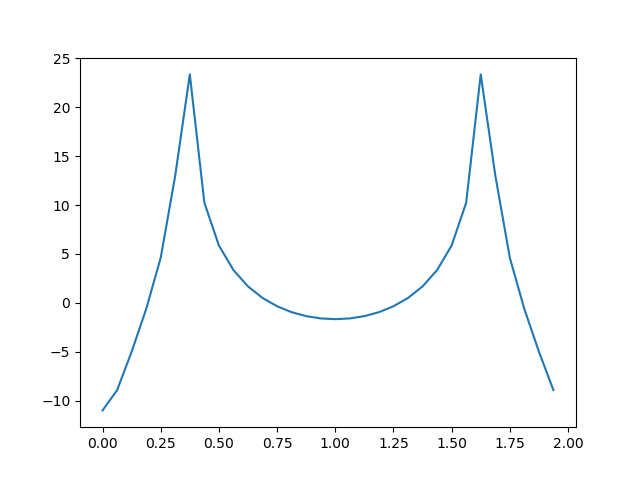

In [21]:
### KOD
n = np.arange(0, L)
w = 2 * n / L
pyplot.figure()
pyplot.plot(w, np.abs(X))
pyplot.figure()
pyplot.plot(w, 20 * np.log10(np.abs(X)))

4. Izračunati DFT signala iz tačke 1. u $N = 512$ tačaka.

In [22]:
### KOD
X512 = fft.fft(x, 512)

5. Pomoću DFT određene u prethodnoj tački nacrtati amplitudni spektar datog signala (kontinualna funkcija, koristiti naredbu plot) tako da na apscisi bude digitalna frekvencija normalizovana tako da vrijednost 1 odgovara frekvenciji od $\pi$ rad/odmjerku. Nacrtati dva grafika: na jednom na ordinati treba da bude moduo spektra signala, a na drugom moduo u dB. Objasniti razliku između dobijenih grafika i grafika iz tačke 3. Kolika je razlika u dB između maksimuma glavnog i bočnih lukova spektra?

<IPython.core.display.Javascript object>


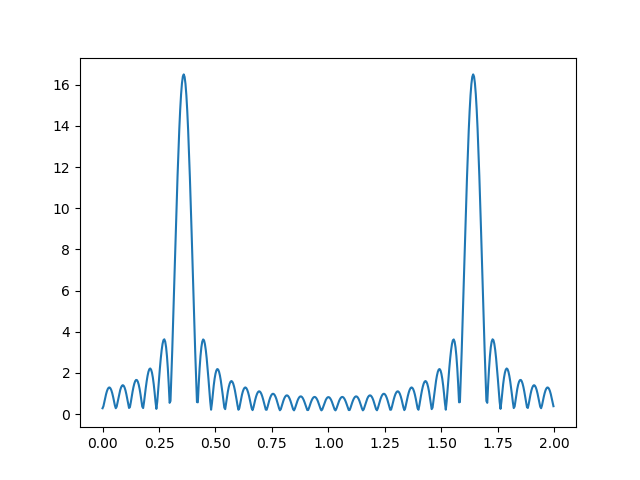

<IPython.core.display.Javascript object>


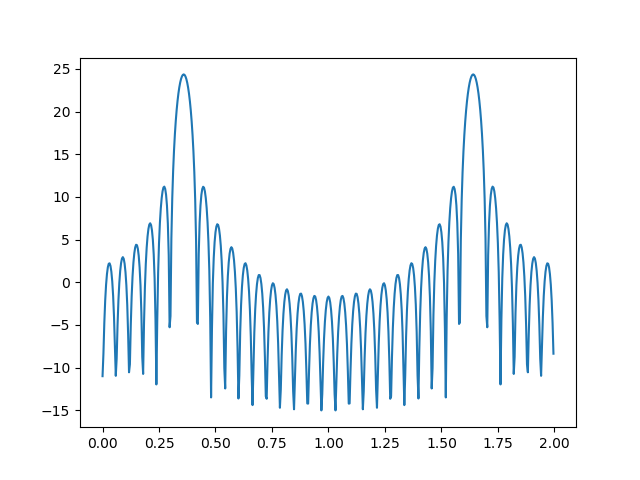

In [24]:
### KOD
n = np.arange(0, 512)
w = 2 * n / 512
pyplot.figure()
pyplot.plot(w, np.abs(X512))
pyplot.figure()
pyplot.plot(w, 20 * np.log10(np.abs(X512)))


6. Generisati Blackmanov prozor dužine $L = 32$. Prozorsku funkciju je moguće generisati korištenjem funkcija iz scipy.signal.windows paketa. Nacrtati prozor u vremenskom domenu. Koristeći Python izračunati DFT Blackmanovog prozora u $N = 512$ tačaka. Nacrtati amplitudni spektar ovog prozora.

<IPython.core.display.Javascript object>


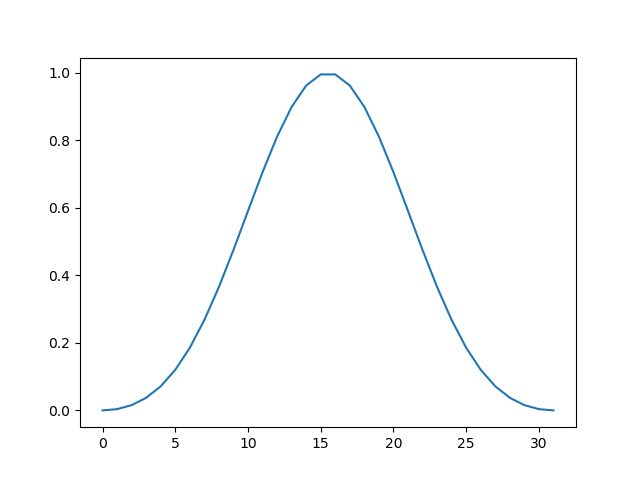

<IPython.core.display.Javascript object>


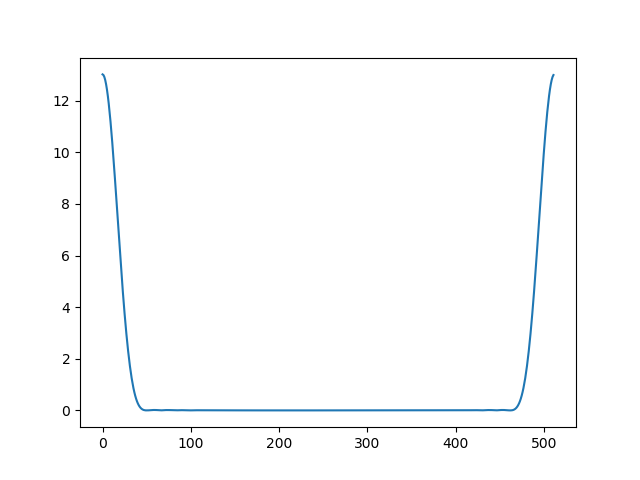

In [26]:
### KOD
L = 32
N = 512
b = windows.blackman(L)
pyplot.figure()
pyplot.plot(b)
B = fft.fft(b, N)
pyplot.figure()
pyplot.plot(np.abs(B))

7. Formirati novi signal primjenom Blackmanovog prozora na signal iz tačke 1. Nacrtati dobijeni signal u vremenskom domenu. Primjena prozorske funkcije na signal odgovara množenju signala i prozorske funkcije element po element.

<IPython.core.display.Javascript object>


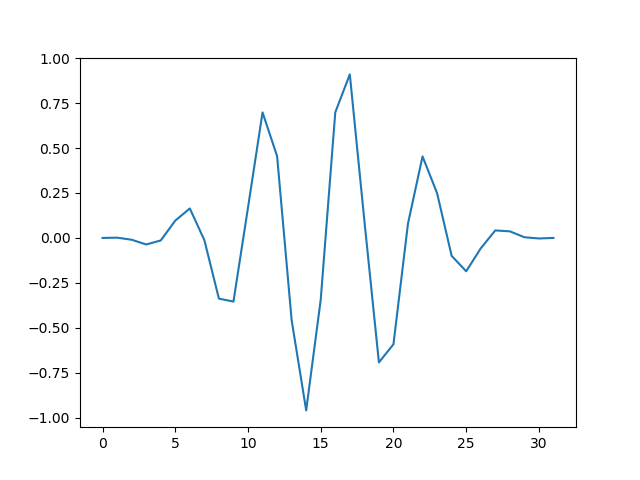

In [27]:
### KOD
xW = x * b
pyplot.figure()
pyplot.plot(xW)

8. Izračunati DFT dobijenog signala u $N = 512$ tačaka.

In [28]:
### KOD
N = 512
XW = fft.fft(xW, N)

9. Pomoću DFT određene u prethodnoj tački nacrtati amplitudni spektar diskretnog signala iz tačke 8. (kontinualna funkcija, koristiti naredbu plot) tako da na apscisi bude digitalna frekvencija normalizovana tako da vrijednost 1 odgovara frekvenciji od $\pi$ rad/odmjerku. Nacrtati dva grafika: na jednom na ordinati treba da bude moduo spektra signala, a na drugom moduo u dB. Kolika je razlika u dB između maksimuma glavnog i bočnih lukova spektra? Objasniti razliku između dobijenih grafika i grafika iz tačke 5.

<IPython.core.display.Javascript object>


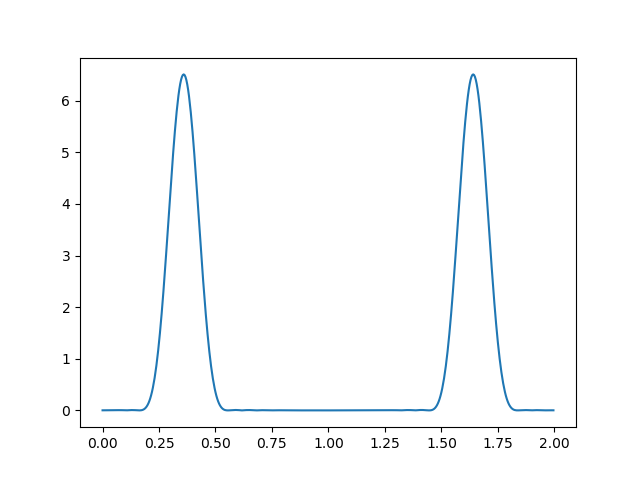

<IPython.core.display.Javascript object>


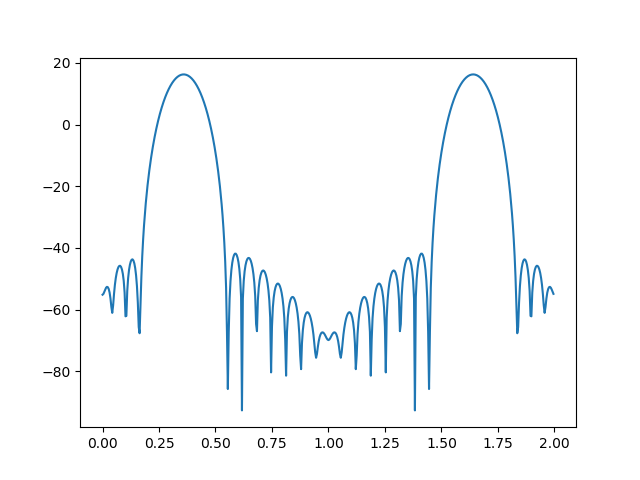

In [30]:
### KOD
n = np.arange(N)
w = 2 * n / N
pyplot.figure()
pyplot.plot(w, np.abs(XW))
pyplot.figure()
pyplot.plot(w, 20 * np.log10(np.abs(XW)))


10. Ponoviti tačke 6-9 za Hammingov prozor. Objasniti razlike u dobijenim rezultatima u odnosu na Blackmanov prozor.

<IPython.core.display.Javascript object>


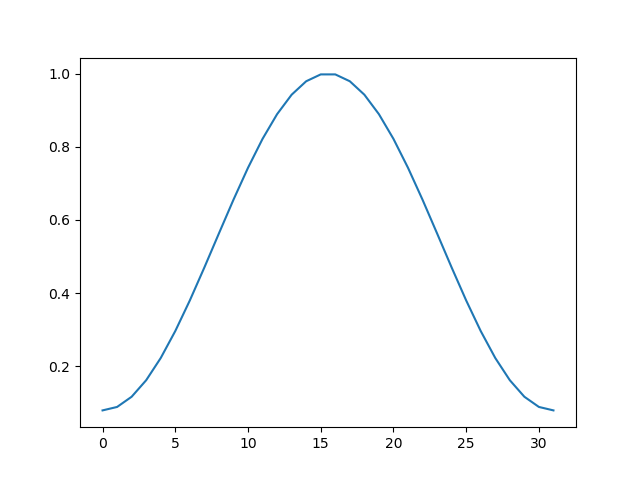

<IPython.core.display.Javascript object>


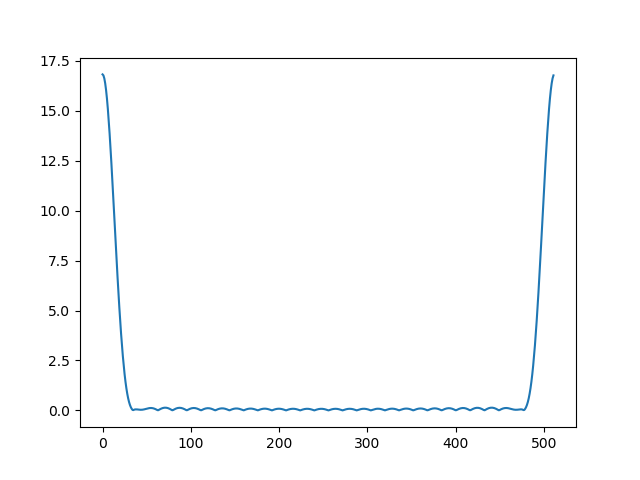

In [31]:
### KOD
L = 32
N = 512
hamming = windows.hamming(L)
XHamm = fft.fft(hamming, N)
pyplot.figure()
pyplot.plot(hamming)
pyplot.figure()
pyplot.plot(np.abs(XHamm))

<IPython.core.display.Javascript object>


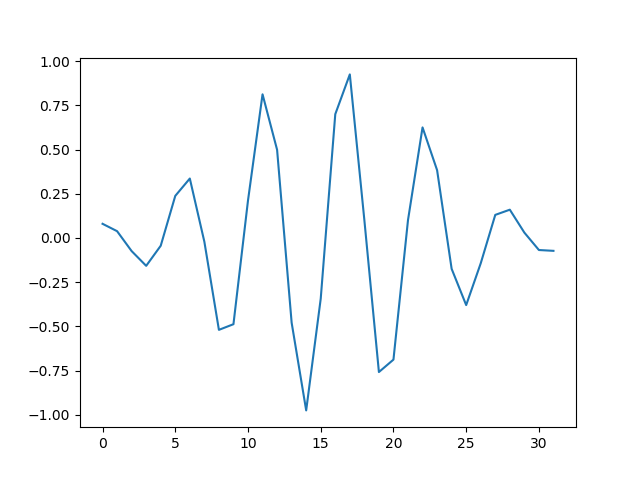

In [32]:
xH = x * hamming
pyplot.figure()
pyplot.plot(xH)

In [36]:
N = 512
n = np.arange(N)
w = 2 * n / N
XH = fft.fft(xH, N)

<IPython.core.display.Javascript object>


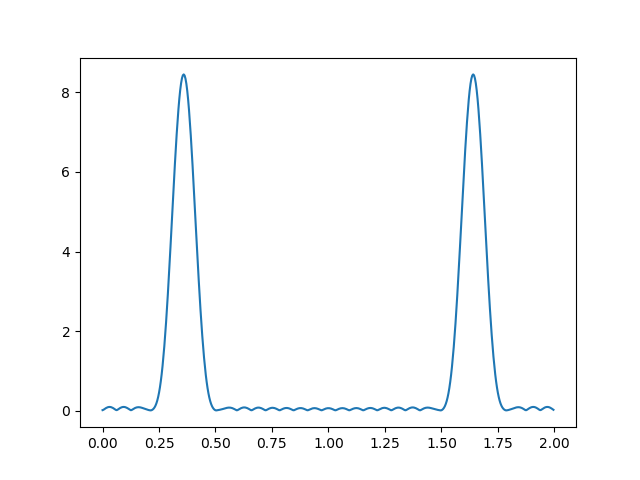

<IPython.core.display.Javascript object>


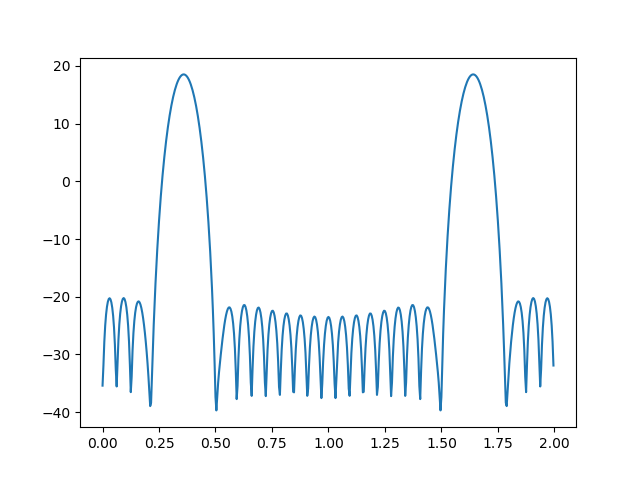

In [37]:
pyplot.figure()
pyplot.plot(w, np.abs(XH))
pyplot.figure()
pyplot.plot(w, 20 * np.log10(np.abs(XH)))

## Spektralna analiza analognih signala pomoću DFT

1. Napisati funkciju u Python-u koji će računati i crtati spektar diskretizovanog analognog signala: freqplot(x, Fs, N, win), čiji su ulazni argumenti vektor x u kojem su odmjerci signala, upotrebljena frekvencija odmjeravanja Fs, broj tačaka u kojima se računa DFT N i odmjerci prozorske funkcije koja će se koristiti win. Na apscisi grafika treba da bude frekvencija u Hercima, pri čemu treba crtati samo spektar signala za pozitivne frekvencije (fizički spektar).

In [63]:
def freqplot(x, Fs, N, win):
    X = fft.rfft(x * win, N)
    freq = fft.rfftfreq(N, 1 / Fs)
    pyplot.figure()
    pyplot.plot(freq, np.abs(X))

2. Testirati napisanu funkciju za signal $x(t) = 0.5cos(2\pi F_1 t) + cos(2\pi F_2 t)$, gdje su $F_1 = 22Hz$, $F_2 = 41Hz$, a frekvencija odmjeravanja $F_S = 100Hz$. Generisati 16 odmjeraka datog signala i nacrtati spektre dobijene pomoću DFT u 16 i 128 tačaka. Takođe, upotrebite pravougaoni i Hemingov prozor. U kojim slučajevima je moguće odrediti tačan broj i frekvencije komponenata signala? 

<IPython.core.display.Javascript object>


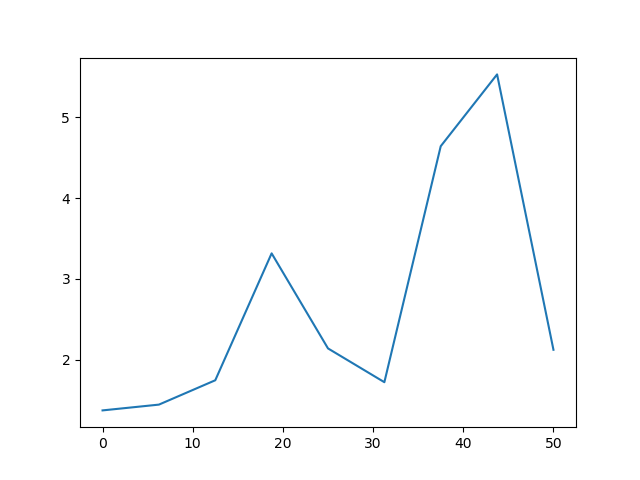

<IPython.core.display.Javascript object>


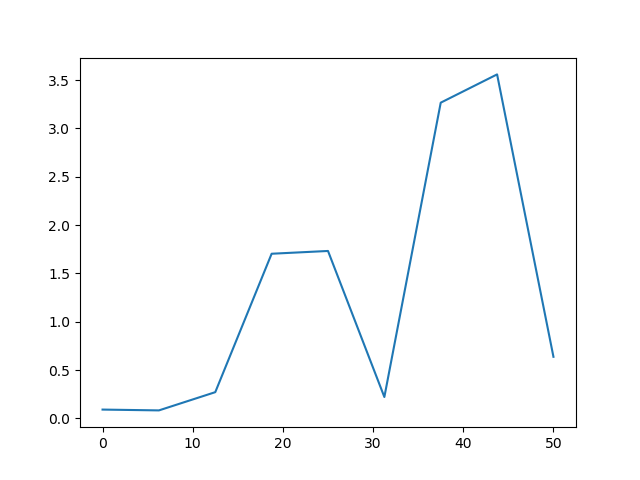

<IPython.core.display.Javascript object>


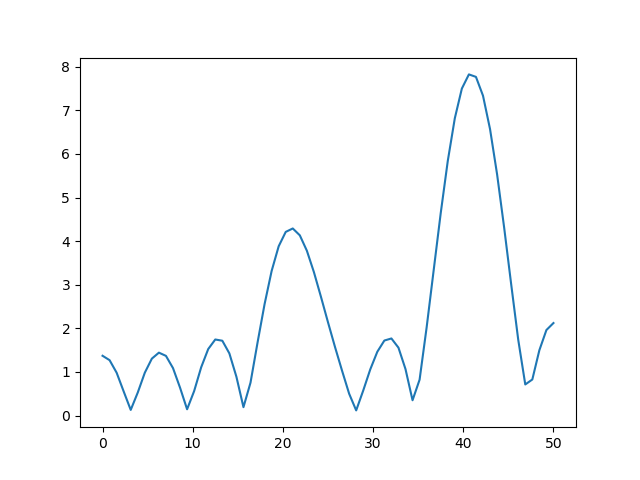

<IPython.core.display.Javascript object>


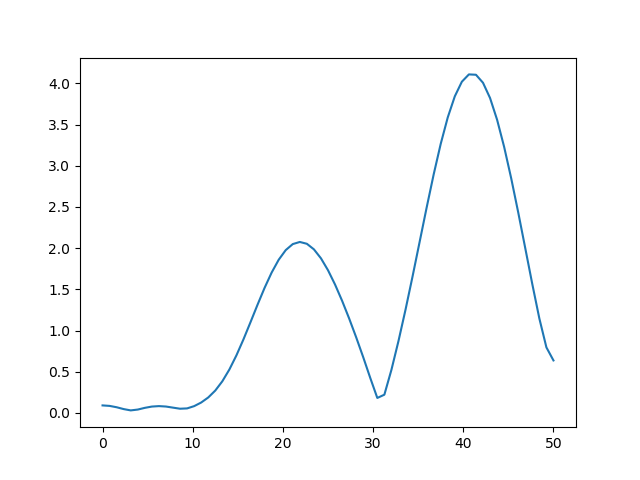

In [66]:
### KOD
Fs = 100
F1 = 22
F2 = 41
L = 16
n = np.arange(L)
x = 0.5 * np.cos(2 * np.pi * F1 * n / Fs) + np.cos(2 * np.pi * F2 * n / Fs)
freqplot(x, Fs, 16, windows.boxcar(len(x)))
freqplot(x, Fs, 16, windows.hamming(len(x)))
freqplot(x, Fs, 128, windows.boxcar(len(x)))
freqplot(x, Fs, 128, windows.hamming(len(x)))
# Ispravna implementacija?

## Rezolucija

1. Dat je kontinualni signal $x(t) = cos(2\pi 800t) + cos(2\pi 888.8t) + cos(2\pi 1600t)$. Odrediti diskretni signal dobijen diskretizacijom datog signala sa brzinom odmjeravanja $F_S = 8kHz$. Kolike su učestanosti dobijenog diskretnog signala? Generisati 64 odmjerka diskretnog signala i na osnovu njih nacrtati pseudorekonstrukciju kontinualnog signala, tj. nacrtati signal korištenjem naredbe plot. Vremensku osu označiti u sekundama.

<IPython.core.display.Javascript object>


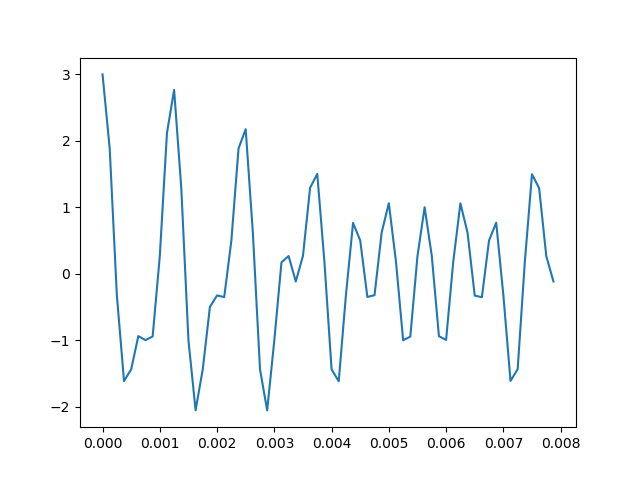

In [69]:
### KOD
Fs = 8000
L = 64
n = np.arange(L)
x = np.cos(2 * np.pi * 800 * n / Fs) + np.cos(2 * np.pi * 888.8 * n / Fs) + np.cos(2 * np.pi * 1600 * n / Fs)
pyplot.figure()
pyplot.plot(n / Fs, x)

2. Izračunati DFT dobijenog diskretnog signala bez dopunjavanja nulama. Nacrtati njegovu magnitudu korištenjem naredbe plot. Na apscisi označiti digitalnu frekvenciju (normalizovanu sa $\pi$). Da li je moguće očekivati dobru aproksimaciju spektra diskretnog signala? Zašto? Da li dolazi do curenja spektra? Zašto? Da li je postignuta zadovoljavajuća rezolucija DFT? 

<IPython.core.display.Javascript object>


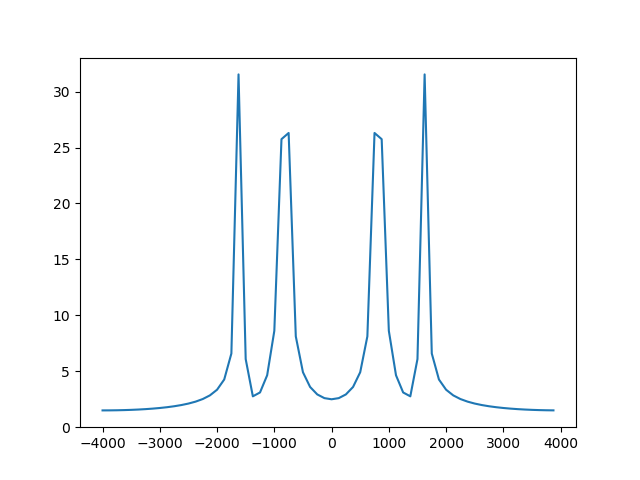

In [79]:
### KOD
# Sirina 
X = fft.fftshift(fft.fft(x))
w = fft.fftshift(fft.fftfreq(len(x)))
pyplot.figure()
pyplot.plot(Fs * w, np.abs(X))

3. Odrediti sada DFT istog diskretnog signala u 1024 i 2048 tačaka uz dopunjavanje nulama. Nacrtati amplitudni spektar datog signala (koristiti naredbu plot). Na apscisi označiti digitalnu frekvenciju (normalizovanu sa $\pi$), a ordinata treba da bude u dB. Da li je moguće očekivati dobru aproksimaciju spektra diskretnog signala? Da li dolazi do curenja spektra? Zašto? Da li je postignuta zadovoljavajuća rezolucija DFT? Kako dopunjavanje nulama utiče na rezoluciju?

In [151]:
### KOD

4. Generisati sada 256 i 512 odmjeraka diskretnog signala i na osnovu njih nacrtati pseudorekonstrukciju kontinualnog signala, tj. nacrtati signal korištenjem naredbe plot. Vremensku osu označiti u sekundama.

In [152]:
### KOD

5. Ponoviti tačke 2. i 3. za odmjerke signala generisane u tački 4. Komentarisati uočene pojave.

In [153]:
### KOD

6. Situacija opisana do sada može se posmatrati i kao primjena pravougaone prozorske funkcije na ulazni signal. U prethodnim sekcijama je pomenuto da se korištenjem drugih prozorskih funkcija može smanjiti uticaj curenja spektra. Ponoviti tačke 2-5 za Blekmenovu i Hemingovu prozorsku funkciju. Komentarisati uticaj prozorske funkcije na rezoluciju.

In [154]:
### KOD